## jantahack: Machine learning in Agriculture

### import libraries

In [373]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [374]:
#load data
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [375]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [376]:
print('shape of train = ',train.shape)
print('shape of test = ', test.shape)

shape of train =  (88858, 10)
shape of test =  (59310, 9)


### handling null values

In [377]:
train1 = train.copy()
test1 = test.copy()

In [378]:
train1.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [379]:
test1.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

only one column has null values in train and test datasets both. first we want to check the correlation of features with each other and also with target then we decide to fill the null values according to this relation.

In [380]:
train1_corr = train1.drop('ID', axis=1).corr().abs().unstack().sort_values(
    kind='quicksort', ascending=False).reset_index()
#rename column
train1_corr.rename(columns=
        {'level_0':'Feature1', 'level_1' : 'Feature2', 0:'Correlation_coefficient'},inplace=True)

In [381]:
train1_corre = train1_corr.drop(train1_corr[train1_corr.Correlation_coefficient == 1.0].index)

In [382]:
train1_corre[train1_corre.Correlation_coefficient > 0.2]

,Feature1,Feature2,Correlation_coefficient
9,Number_Weeks_Quit,Pesticide_Use_Category,0.554169
10,Pesticide_Use_Category,Number_Weeks_Quit,0.554169
11,Number_Weeks_Quit,Number_Weeks_Used,0.449007
12,Number_Weeks_Used,Number_Weeks_Quit,0.449007
13,Estimated_Insects_Count,Number_Weeks_Used,0.434925
14,Number_Weeks_Used,Estimated_Insects_Count,0.434925
15,Number_Weeks_Used,Pesticide_Use_Category,0.344131
16,Pesticide_Use_Category,Number_Weeks_Used,0.344131
17,Estimated_Insects_Count,Number_Weeks_Quit,0.299279
18,Number_Weeks_Quit,Estimated_Insects_Count,0.299279


In [383]:
train1['Number_Weeks_Used'] = train1['Number_Weeks_Used'].fillna(train1['Number_Weeks_Used'].mode()[0])
test1['Number_Weeks_Used'] = test1['Number_Weeks_Used'].fillna(test1['Number_Weeks_Used'].mode()[0])

In [384]:
train1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [385]:
test1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [386]:
train1 = train1.drop('ID', axis=1)
test1 = test1.drop('ID', axis=1)

In [387]:
print(train1.shape, test1.shape)

(88858, 9) (59310, 8)


### EDA

In [388]:
train2 = train1.copy()
test2 = test1.copy()

In [389]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          88858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [390]:
#calculate no. of unique values in datasets
print('unique value in each feature')
for feature in train2.columns:
    print('{} = {}'.format(feature, len(train2[feature].unique())))

unique value in each feature
Estimated_Insects_Count = 71
Crop_Type = 2
Soil_Type = 2
Pesticide_Use_Category = 3
Number_Doses_Week = 20
Number_Weeks_Used = 64
Number_Weeks_Quit = 51
Season = 3
Crop_Damage = 3


In [391]:
# 0 >> alive
# 1 >> damage due to other causes
# 2 >> damage due to Pesticide
train2.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [392]:
train2 = train2.astype({'Crop_Type':'object','Soil_Type':'object',
                       'Pesticide_Use_Category':'object','Season':'object'})
test2 = test2.astype({'Crop_Type':'object','Soil_Type':'object',
                       'Pesticide_Use_Category':'object','Season':'object'})

#### categorical feature

In [393]:
categorical_feature = [f for f in train2.columns if train2[f].dtype == 'object']
categorical_feature

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

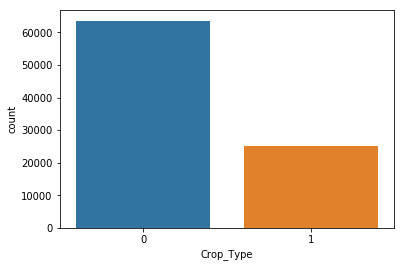

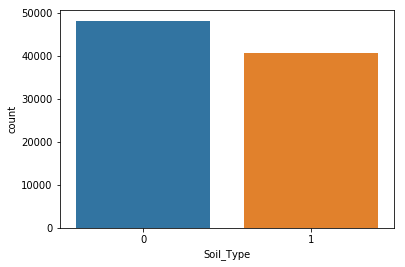

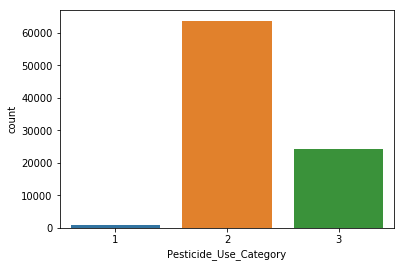

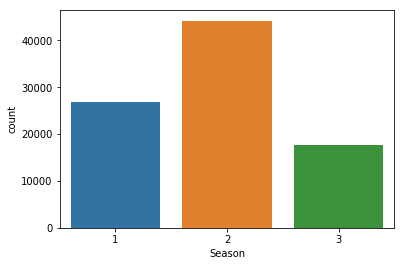

In [394]:
#visualize count plot
for feature in categorical_feature:
    sns.countplot(x=train2[feature])
    plt.show()

#### numerical feature

In [395]:
numerical_feature = [f for f in train2.columns if f not in categorical_feature]
numerical_feature.remove('Crop_Damage')
numerical_feature

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit']

In [396]:
def diagnostic_plots(df, var):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(df[var], hist=True)
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.show()

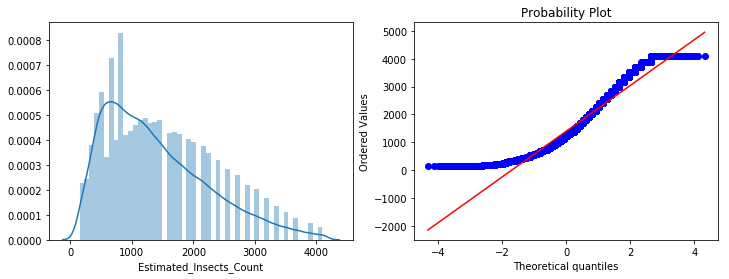

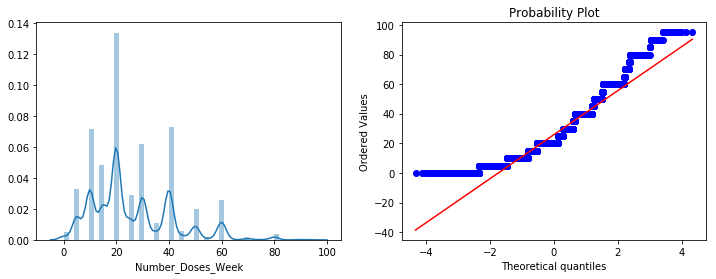

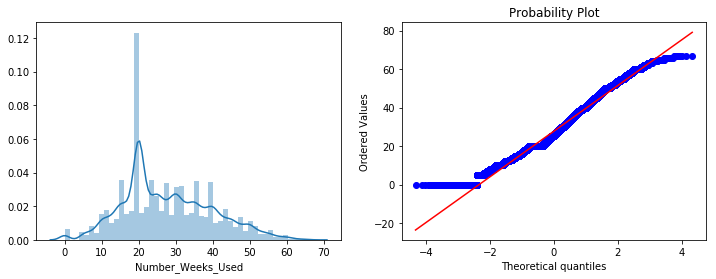

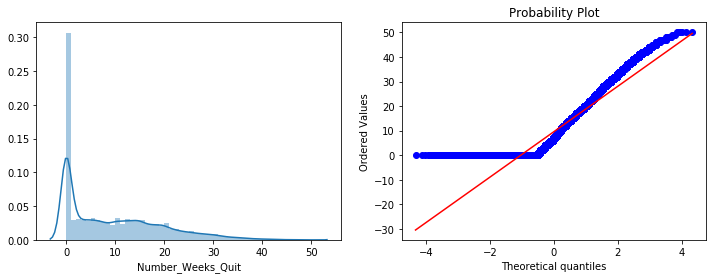

In [397]:
for feature in numerical_feature:
    diagnostic_plots(train2, feature)

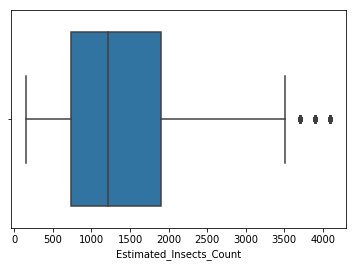

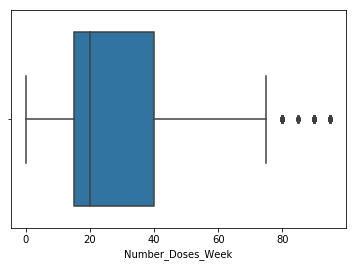

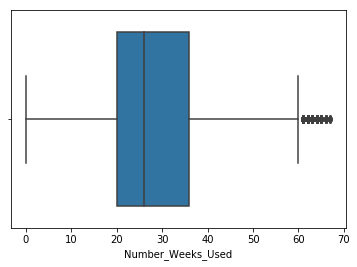

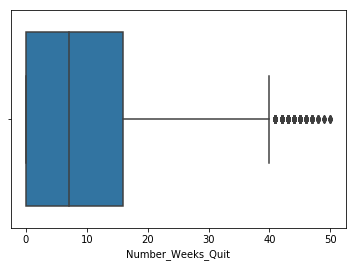

In [398]:
#numerical feature box plot visualization
for feature in numerical_feature:
    sns.boxplot(x=train2[feature])
    plt.show()

## Outlier removal

In [399]:
train3 = train2.copy()

In [400]:
# z = (observation - mean) / std

def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i - mean)/std
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers

In [401]:
Estimated_Insects_Count_ol = detect_outliers(train3.Estimated_Insects_Count)
print('len of outlier =', len(Estimated_Insects_Count_ol))
print(Estimated_Insects_Count_ol)

len of outlier = 356
[4096, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4096, 4097, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4097, 4097, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4097, 4096, 4097, 4097, 4097, 4096, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4097, 4096, 4096, 4096, 4097, 4097, 4097, 4097, 4097, 4096, 4097, 4097, 4096, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4097, 4097, 4096, 4097, 4096, 4096, 4097, 4097, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4096, 4097, 4097, 4096, 4096, 4096, 4096, 4096, 4097, 4096, 4096, 4097, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4096, 

In [402]:
np.min(Estimated_Insects_Count_ol)

4096

In [403]:
#remove Estimated_Insects_Count outlier
train3 = train3[train3.Estimated_Insects_Count < 4096]

In [404]:
#finding outlier in Number_Doses_Week
Number_Doses_Week_ol = detect_outliers(train3.Number_Doses_Week)
print('no. of outlier = ', len(Number_Doses_Week_ol))
print(Number_Doses_Week_ol)

no. of outlier =  856
[80, 80, 80, 90, 80, 80, 80, 90, 80, 80, 80, 80, 80, 80, 90, 80, 80, 90, 85, 80, 85, 80, 80, 80, 85, 80, 80, 80, 75, 80, 80, 95, 85, 80, 90, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 90, 80, 80, 80, 80, 80, 80, 80, 80, 75, 80, 80, 80, 80, 80, 80, 80, 80, 90, 75, 75, 75, 80, 80, 80, 80, 80, 90, 80, 80, 80, 80, 80, 75, 75, 80, 80, 75, 80, 80, 80, 90, 80, 80, 75, 80, 80, 80, 80, 80, 80, 80, 75, 80, 80, 80, 80, 80, 90, 90, 80, 80, 75, 80, 75, 90, 80, 80, 80, 95, 90, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 95, 80, 80, 80, 80, 80, 80, 90, 80, 80, 75, 90, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 75, 80, 80, 80, 80, 90, 80, 80, 80, 80, 80, 80, 80, 75, 75, 80, 90, 80, 80, 80, 80, 90, 80, 80, 90, 80, 75, 80, 80, 80, 80, 80, 90, 80, 75, 80, 80, 80, 80, 80, 80, 75, 80, 80, 80, 80, 80, 90, 80, 80, 80, 80, 80, 80, 80, 80, 95, 90, 80, 95, 80, 80, 80, 80, 80, 90, 80, 80, 80, 75, 80, 80, 80, 90, 80, 80, 95, 80, 80, 80, 80, 80, 80, 90, 80, 8

In [405]:
np.min(Number_Doses_Week_ol)

75

In [406]:
train3 = train3[train3.Number_Doses_Week < 75]

In [407]:
#finding outlier in Number_Weeks_Used
Number_Weeks_Used_ol = detect_outliers(train3.Number_Weeks_Used)
print('no. of outlier = ', len(Number_Weeks_Used_ol))
print(Number_Weeks_Used_ol)

no. of outlier =  89
[66.0, 64.0, 65.0, 65.0, 65.0, 66.0, 66.0, 65.0, 67.0, 65.0, 67.0, 64.0, 67.0, 66.0, 66.0, 64.0, 64.0, 65.0, 66.0, 64.0, 67.0, 64.0, 65.0, 65.0, 67.0, 65.0, 65.0, 65.0, 64.0, 65.0, 64.0, 64.0, 66.0, 64.0, 65.0, 64.0, 66.0, 65.0, 64.0, 64.0, 66.0, 65.0, 64.0, 65.0, 65.0, 65.0, 64.0, 64.0, 65.0, 64.0, 66.0, 64.0, 66.0, 66.0, 64.0, 65.0, 67.0, 65.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 66.0, 65.0, 65.0, 64.0, 64.0, 64.0, 65.0, 65.0, 64.0, 64.0, 65.0, 64.0, 66.0, 64.0, 64.0, 66.0, 67.0, 64.0, 64.0, 64.0, 64.0, 67.0, 64.0, 64.0, 64.0]


In [408]:
np.min(Number_Weeks_Used_ol)

64.0

In [409]:
# remove Number_Weeks_Used outlier
train3 = train3[train3.Number_Weeks_Used < 64]

In [410]:
#finding outlier in Number_Weeks_Quit
Number_Weeks_Quit_ol = detect_outliers(train3.Number_Weeks_Quit)
print('no. of outlier = ',len(Number_Weeks_Quit_ol))
print(Number_Weeks_Quit_ol)

no. of outlier =  430
[44, 41, 47, 46, 47, 40, 42, 42, 41, 44, 40, 41, 41, 41, 41, 40, 41, 41, 42, 41, 40, 43, 40, 42, 45, 41, 42, 41, 46, 41, 41, 40, 43, 42, 42, 40, 40, 46, 46, 46, 40, 44, 41, 41, 40, 44, 49, 41, 40, 40, 42, 42, 42, 43, 43, 41, 41, 40, 40, 46, 40, 40, 41, 45, 42, 41, 40, 43, 42, 44, 44, 40, 42, 46, 40, 43, 40, 40, 43, 44, 45, 43, 43, 40, 40, 46, 40, 40, 41, 42, 43, 41, 45, 42, 48, 40, 40, 41, 41, 40, 41, 44, 40, 44, 41, 44, 44, 46, 42, 40, 43, 43, 42, 47, 44, 40, 42, 43, 44, 41, 46, 42, 40, 40, 41, 41, 41, 47, 41, 47, 41, 40, 49, 43, 42, 42, 42, 48, 42, 40, 44, 44, 44, 41, 40, 41, 43, 40, 41, 43, 46, 41, 41, 40, 41, 40, 41, 41, 43, 44, 42, 40, 40, 43, 41, 48, 42, 40, 40, 42, 42, 43, 41, 40, 43, 40, 47, 40, 42, 42, 45, 46, 42, 40, 43, 40, 42, 42, 44, 43, 40, 46, 42, 42, 40, 41, 42, 40, 44, 47, 40, 42, 42, 40, 41, 41, 45, 40, 45, 48, 40, 41, 41, 43, 43, 44, 43, 40, 41, 41, 42, 40, 45, 40, 42, 44, 44, 40, 46, 41, 40, 40, 40, 44, 47, 40, 44, 40, 42, 40, 41, 44, 44, 43, 4

In [411]:
np.min(Number_Weeks_Quit_ol)

40

In [412]:
train3 = train3[train3.Number_Weeks_Quit < 40]

In [413]:
train3.shape

(87127, 9)

## feature selection

In [433]:
train4 = train3.copy()

#### checking strength of feature using one_way_anova

In [434]:
data = train4.astype({'Crop_Damage':'object'})

In [435]:
for feature in data.columns:
    crop_damage = data.Crop_Damage.unique()
    dat = {grp:data[feature][data.Crop_Damage == grp] for grp in crop_damage}
    print(feature,' :--')
    f, p = stats.f_oneway(dat[1], dat[0])
    print('f = ',f)
    print('p = ', p)

Estimated_Insects_Count  :--
f =  3920.10040082883
p =  0.0
Crop_Type  :--
f =  67.04631694550244
p =  2.688419777288819e-16
Soil_Type  :--
f =  33.43476662294082
p =  7.395218946116713e-09
Pesticide_Use_Category  :--
f =  1869.8190686900728
p =  0.0
Number_Doses_Week  :--
f =  141.4474975208617
p =  1.3634016712464595e-32
Number_Weeks_Used  :--
f =  3303.5202627910107
p =  0.0
Number_Weeks_Quit  :--
f =  820.9469512493314
p =  1.088515488494167e-179
Season  :--
f =  0.3701695782325499
p =  0.5429134765629368
Crop_Damage  :--
f =  -2.3946547302078716e+20
p =  nan


In [436]:
train4 = train4.drop('Soil_Type', axis=1)

In [457]:
test2 = test2.drop('Soil_Type', axis=1)

## feature engineering

In [458]:
train5 = train4.copy()
test3 = test2.copy()

In [459]:
train5 = pd.get_dummies(train5, columns=['Pesticide_Use_Category',
                                         'Season','Crop_Type'])
test3 = pd.get_dummies(test3, columns=['Pesticide_Use_Category',
                                         'Season','Crop_Type'])

In [460]:
train5.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3,Crop_Type_0,Crop_Type_1
0,188,0,0.0,0,0,1,0,0,1,0,0,0,1
1,209,0,0.0,0,1,1,0,0,0,1,0,0,1
2,257,0,0.0,0,1,1,0,0,0,1,0,0,1
3,257,0,0.0,0,1,1,0,0,0,1,0,0,1
4,342,0,0.0,0,1,1,0,0,0,1,0,0,1


In [461]:
print('train5 shape = ',train5.shape)
print('test3 shape = ', test3.shape)

train5 shape =  (87127, 13)
test3 shape =  (59310, 12)


In [462]:
#feature scale
feature_scale = [feature for feature in train5.columns if feature != 'Crop_Damage']
scaler = MinMaxScaler()
scaler.fit(train5[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [463]:
scale = scaler.transform(train5[feature_scale])

In [464]:
# transform the train and test set, and add on the Crop_Damage variables
train5 = pd.concat([train5['Crop_Damage'].reset_index(drop = True),
                  pd.DataFrame(scale, columns=feature_scale)],axis=1)

In [465]:
train5.head()

,Crop_Damage,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3,Crop_Type_0,Crop_Type_1
0,0,0.010144,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.015750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.028564,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0.028564,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.051255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [466]:
[c for c in test3.columns if c not in train5.columns]

[]

In [467]:
x = train5.drop('Crop_Damage', axis=1)
y = train5.Crop_Damage
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## model building and hyperparameter tuning

#### Logistic Regression

In [468]:
logr_model = LogisticRegression()
logr_model.fit(x_train, y_train)
logr_model.score(x_test, y_test)

c:\users\j7000\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8398944106507518

Text(42.0, 0.5, 'Truth')

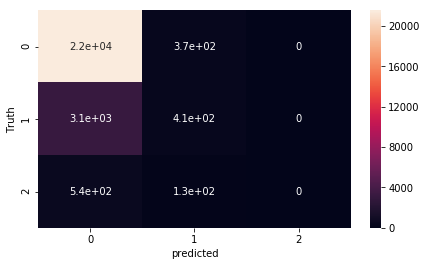

In [469]:
cm = confusion_matrix(y_test, logr_model.predict(x_test))
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [470]:
print(cm)

[[21546   371     0]
 [ 3148   408     0]
 [  538   128     0]]


#### Random Forest Classifier

In [471]:
rfc_model = RandomForestClassifier(
criterion='gini',
n_estimators=1100,
max_depth=5,
min_samples_split=4,
min_samples_leaf=5,
max_features='auto',
oob_score=True,

n_jobs=-1,
verbose=1
)

rfc_model.fit(x_train, y_train)
rfc_model.score(x_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:   44.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    2.8s finished


0.8429167144879299

In [472]:
cm = confusion_matrix(y_test, rfc_model.predict(x_test))
print(cm)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s


[[21880    37     0]
 [ 3403   153     0]
 [  607    59     0]]


[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    2.7s finished


In [ ]:
print(T)

#### ExtraTreesClassifier

In [ ]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train, y_train)
etc_model.score(x_test,y_test)

In [ ]:
cm = confusion_matrix(y_test, etc_model.predict(x_test))
print(cm)

#### SVM

In [ ]:
#SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, svc_model.predict(x_test))
print(cm)

In [ ]:
#LinearSVC 
lsvc_model = LinearSVC()
lsvc_model.fit(x_train, y_train)
lsvc_model.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, lsvc_model.predict(x_test))

In [ ]:
print(cm)

#### KNeighborsClassifier

In [ ]:
knnc_model = KNeighborsClassifier()
knnc_model.fit(x_train, y_train)
knnc_model.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, knnc_model.predict(x_test))
print(cm)

#### GaussianNB

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_model.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, gnb_model.predict(x_test))
print(cm)

#### SGDClassifier

In [ ]:
sgdc_model = SGDClassifier()
sgdc_model.fit(x_train, y_train)
sgdc_model.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, sgdc_model.predict(x_test))
print(cm)

#### DecisionTreeClassifier

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

In [ ]:
cm = confusion_matrix(y_test, dtc_model.predict(x_test))
print(cm)

In [ ]:
print(metrics.classification_report(y_test, dtc_model.predict(x_test)))

#### Perceptron

In [ ]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
perceptron.score(x_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, perceptron.predict(x_test))
print(cm)

### submission file

In [ ]:
print(A)

In [473]:
u = rfc_model.predict(test3)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    4.7s finished


In [474]:
u = pd.DataFrame(u)
r = pd.concat([test.ID, u], axis=1)
r.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [475]:
r.to_csv('sub3.csv')

In [ ]:
z = pd.read_csv('sub2.csv')
z.Crop_Damage.value_counts()